Best n_neighbors: 20, Best algorithm: auto, Best contamination: 0.05, Variance: 22811.976768078086


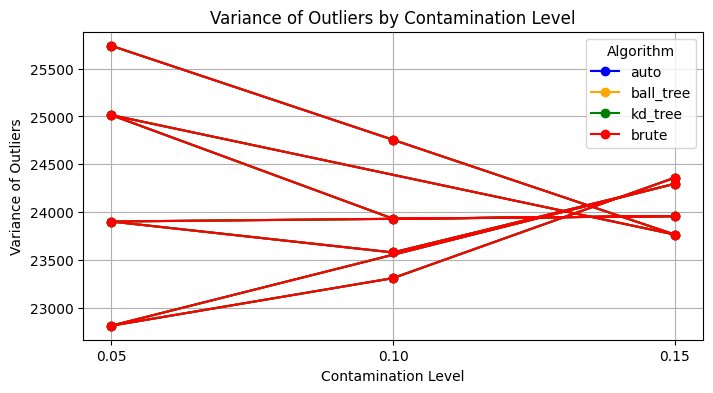

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# loading the Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# features and target variable
X = data
y = target

# a list to store the results
results = []

# different n_neighbors, algorithms and contamination values
n_neighbors_list = [5, 10, 15, 20]
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
contamination_list = [0.05, 0.1, 0.15]  # %5, %10, %15 oranında outlier bekleme

# applying LOF
for n_neighbors in n_neighbors_list:
    for algorithm in algorithms:
        for contamination in contamination_list:
            lof = LocalOutlierFactor(n_neighbors=n_neighbors, algorithm=algorithm, contamination=contamination)
            outlier_labels = lof.fit_predict(X)

            # mark the outliers
            is_outlier = outlier_labels == -1

            # calculate the variance
            variance = np.var(X[is_outlier])

            # save results
            results.append((n_neighbors, algorithm, contamination, variance))

# find the hyperparameters with the lowest variance
best_result = min(results, key=lambda x: x[3])

# print results
print(f"Best n_neighbors: {best_result[0]}, Best algorithm: {best_result[1]}, Best contamination: {best_result[2]}, Variance: {best_result[3]}")

# convert results to DataFrame
results_df = pd.DataFrame(results, columns=['n_neighbors', 'algorithm', 'contamination', 'variance'])

# plotting the graph
plt.figure(figsize=(8, 4))

# coloring for each algorithm
colors = {'auto': 'blue', 'ball_tree': 'orange', 'kd_tree': 'green', 'brute': 'red'}

for algorithm in algorithms:
    subset = results_df[results_df['algorithm'] == algorithm]
    # I make sure colors are assigned manually
    plt.plot(subset['contamination'], subset['variance'], marker='o', label=algorithm, color=colors[algorithm])

plt.title('Variance of Outliers by Contamination Level')
plt.xlabel('Contamination Level')
plt.ylabel('Variance of Outliers')
plt.xticks(contamination_list)
plt.legend(title='Algorithm')
plt.grid()
plt.show()